# Clustering the Military Powers of Countries

In [2]:
# Ülkelerin Askeri Gücüne Göre Kümeleme

In [1]:
## Kütüphaneler Yüklenir.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# EDA

In [23]:
## header=1 çok önemli yoksa  tek tek kolonları rename veya silmekle uğraşmak lazım
#skiprows=[0]
df=pd.read_excel('World military power.xlsx',header=1)

In [24]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [18]:
##df.rename(columns = {'2020 ranking':'Military Strength'}, inplace = True)
##                    "Unnamed: 1":"Military Strength Power Index"

In [13]:
# İlk Satır Gereksiz bir bilgi olduğundan Tamamen kaldırıyoruz.
##df = df.drop(labels=0, axis=0)
##df = df.drop(df.index[0])

In [25]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strength 

In [26]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,124.000000,115.000000,115.000000,115.000000,115.000000,138.000000,129.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,84.983871,0.382609,4.800000,2.052174,3.521739,290.043478,3964.224806
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,146.114165,1.971653,13.706958,10.000740,6.481211,1212.967393,3760.099671
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,29.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,33.500000,1587.000000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,38.000000,0.000000,0.000000,0.000000,0.000000,68.000000,2816.000000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,77.750000,0.000000,4.000000,0.000000,5.500000,150.750000,5267.000000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,13513.000000,22457.000000


In [28]:
df.corr()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Total Border Coverage value
Military Strength Power Index,1.000000,-0.267329,-0.310888,-0.241948,-0.267104,-0.284756,-0.244545,-0.231723,-0.324300,-0.361796,-0.268935,-0.335405,-0.247800,-0.375253,-0.195382,-0.322829,-0.207112,-0.421650,-0.173362,-0.278147
Aircraft Strength value,-0.267329,1.000000,0.944492,0.860263,0.974029,0.974288,0.992802,0.964266,0.625598,0.844898,0.513687,0.566740,0.520071,0.526446,0.922611,0.668530,0.915876,0.232956,0.884260,0.431274
Fighter/Interceptor Strength value,-0.310888,0.944492,1.000000,0.878844,0.908768,0.886299,0.905858,0.922056,0.719875,0.932691,0.659839,0.696251,0.669376,0.664113,0.806006,0.802354,0.877554,0.451837,0.733474,0.508782
Attack Aircraft Strength value,-0.241948,0.860263,0.878844,1.000000,0.892666,0.762131,0.820890,0.916149,0.812318,0.871821,0.776320,0.684005,0.772270,0.631921,0.656635,0.761357,0.734484,0.323042,0.663088,0.615603
Transport Aircraft Fleet Strength value,-0.267104,0.974029,0.908768,0.892666,1.000000,0.927991,0.964244,0.948860,0.647605,0.818061,0.530161,0.576765,0.542214,0.518940,0.870717,0.649020,0.868212,0.232091,0.874719,0.523876
Trainer Aircraft Fleet value,-0.284756,0.974288,0.886299,0.762131,0.927991,1.000000,0.973744,0.909770,0.547113,0.773963,0.392221,0.495196,0.400216,0.457386,0.936417,0.576860,0.886580,0.165191,0.899261,0.337081
Helicopter Fleet Strength value,-0.244545,0.992802,0.905858,0.820890,0.964244,0.973744,1.000000,0.953013,0.568368,0.798437,0.453496,0.509179,0.448298,0.466387,0.943658,0.606240,0.911284,0.160675,0.904459,0.375196
Attack Helicopter Fleet Strength value,-0.231723,0.964266,0.922056,0.916149,0.948860,0.909770,0.953013,1.000000,0.693216,0.860358,0.640999,0.570675,0.614542,0.508812,0.855873,0.682027,0.882033,0.236247,0.812823,0.462982
Tank Strength value,-0.324300,0.625598,0.719875,0.812318,0.647605,0.547113,0.568368,0.693216,1.000000,0.778759,0.830509,0.805103,0.864147,0.686335,0.368344,0.746872,0.447492,0.325212,0.346984,0.484769
AFV/APC Strength value,-0.361796,0.844898,0.932691,0.871821,0.818061,0.773963,0.798437,0.860358,0.778759,1.000000,0.790061,0.765663,0.751266,0.689494,0.663752,0.787019,0.745806,0.498937,0.591883,0.507885


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

<AxesSubplot:>

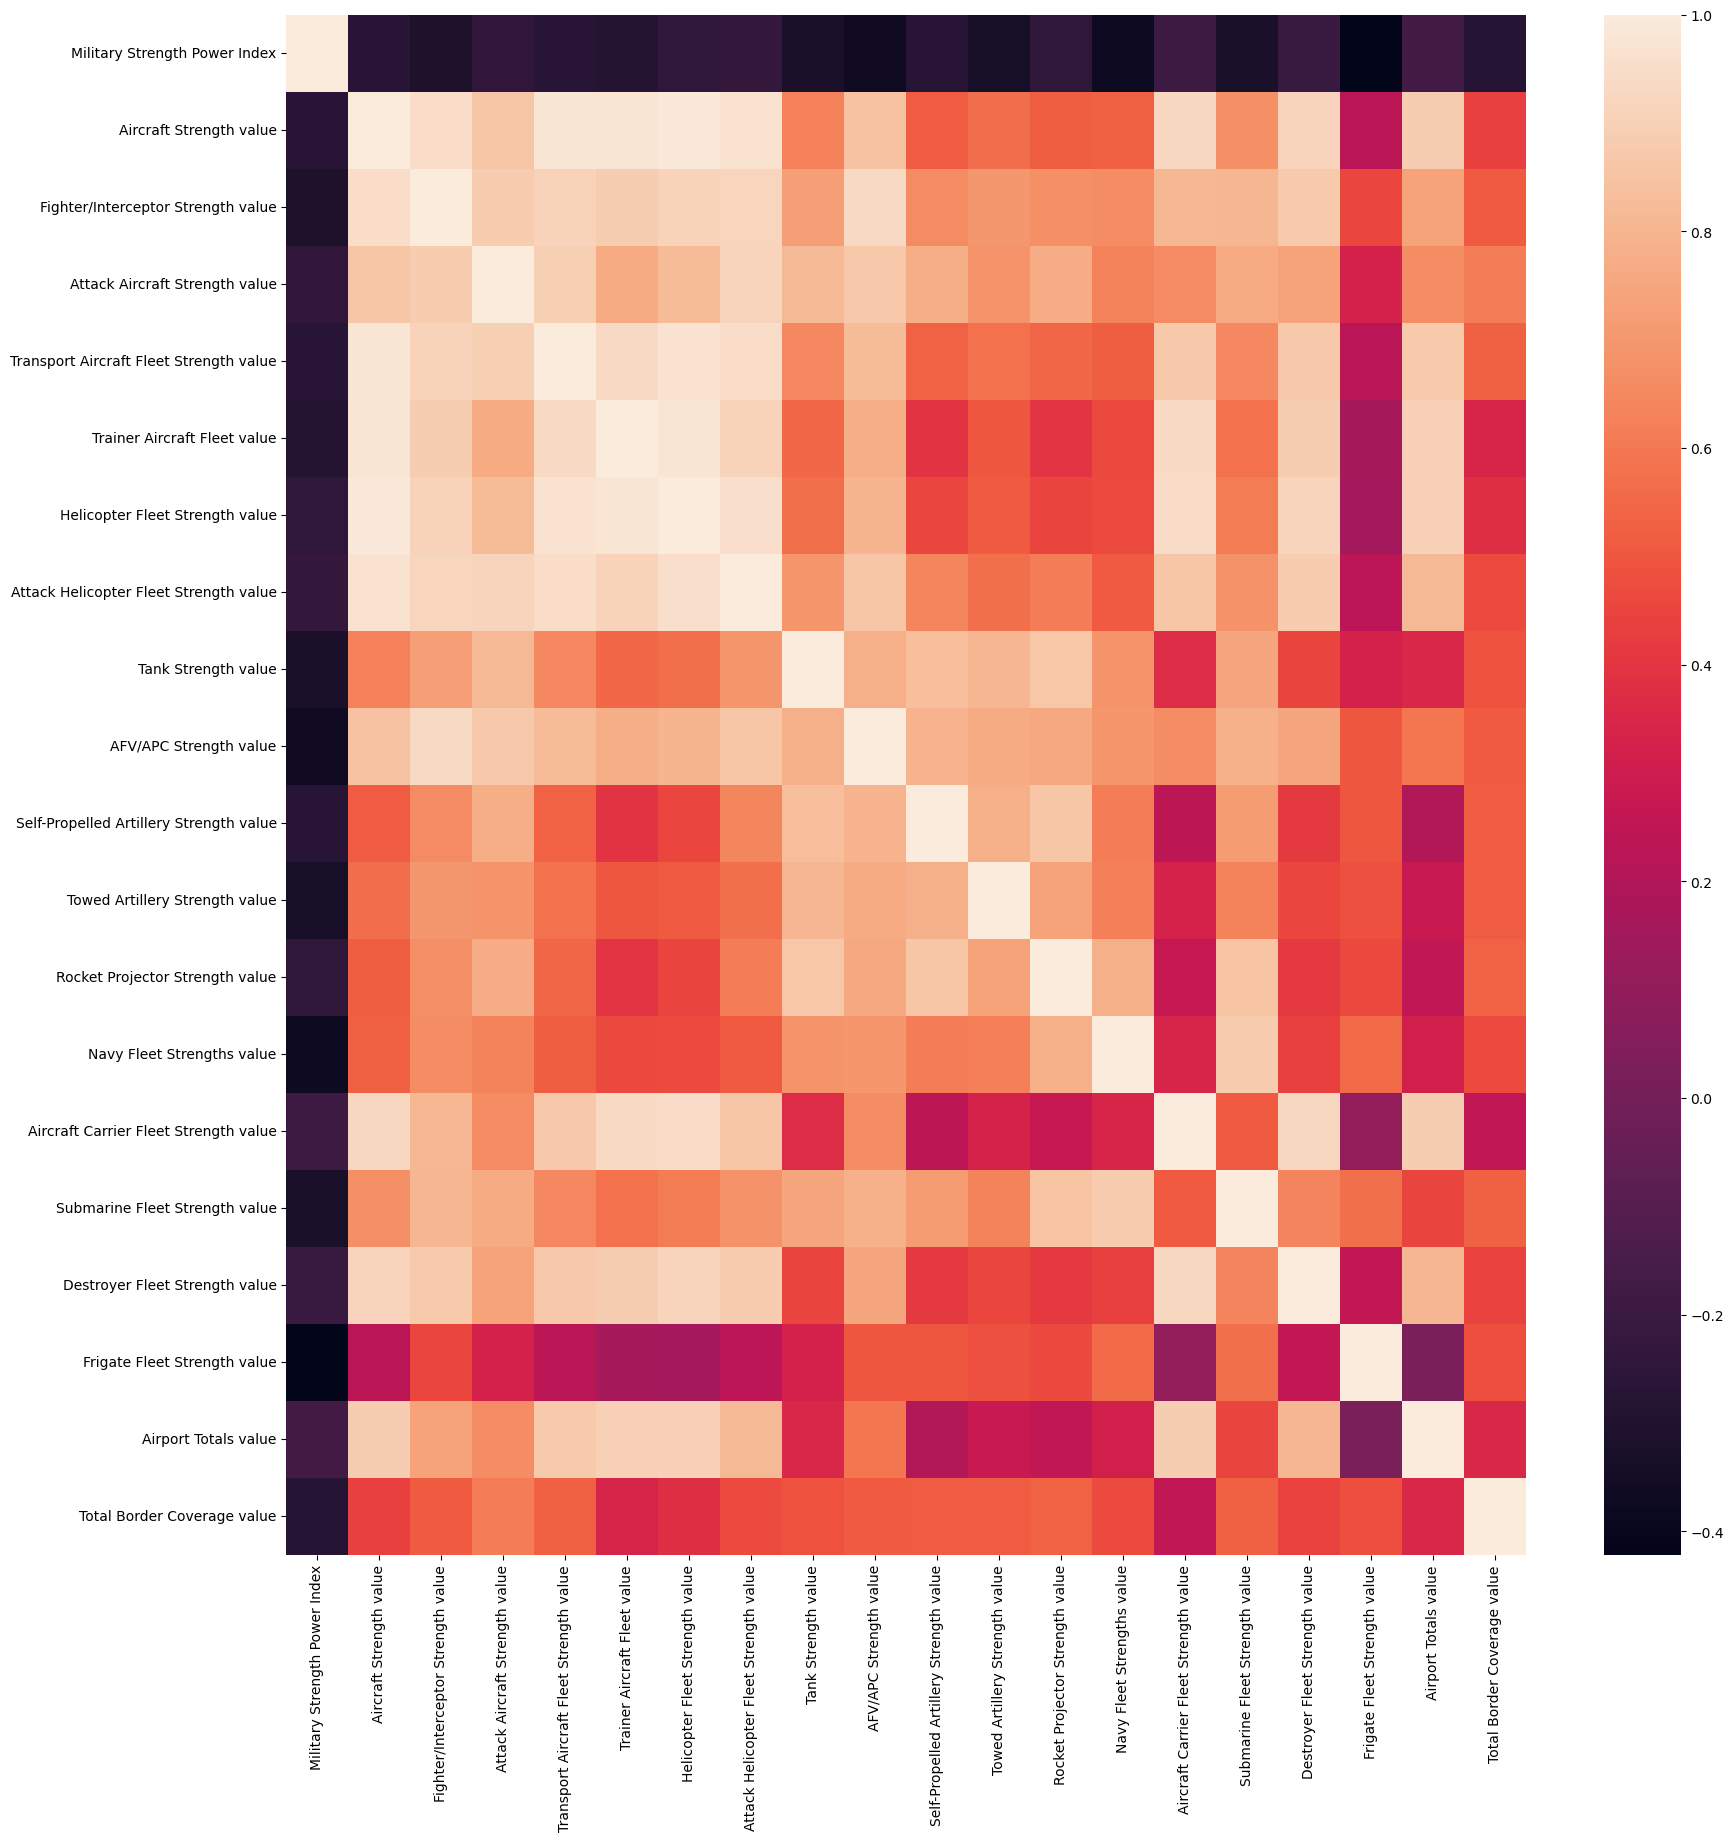

In [36]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(df.corr())

# Feature Engineering

In [37]:
df.insert(0, "Country",df["Military Strength"])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength                        138 non-null    object 
 2   Military Strength Power Index            138 non-null    float64
 3   Aircraft Strength                        138 non-null    object 
 4   Aircraft Strength value                  138 non-null    int64  
 5   Fighter/Interceptor Strength             138 non-null    object 
 6   Fighter/Interceptor Strength value       138 non-null    int64  
 7   Attack Aircraft Strength                 138 non-null    object 
 8   Attack Aircraft Strength value           138 non-null    int64  
 9   Transport Aircraft Fleet Strength        138 non-null    object 
 10  Transport Aircraft Fleet Strength value  138 non-n

In [39]:
df.head()

,Country,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [40]:
## Object Alanlarına ihtiyacımız olmadığından ve 
#dataset imiz int,string sıralaması ile gittiğinden aşağ kod işimizi görecektir
df.drop(columns = df.iloc[:,1:60:2], inplace = True)

In [41]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,...,4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,...,176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,...,1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [43]:
df.fillna(0, inplace=True)

In [44]:
df.replace(',','', regex=True, inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [96]:
df.columns[1:]

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value',
       '

In [98]:
df.astype({col:np.int64 for col in df.columns[1:]})

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1,260,0,25,30,0,187,0,0,...,43,0,5500,0,14325743,34940837,652230,0,1200,5987
1,Albania,2,19,0,0,0,0,19,0,0,...,4,16000,42500,168300000,1519438,3057220,28748,362,41,691
2,Algeria,0,551,103,22,59,87,257,45,880,...,157,1306000,325000,12200000000,20741263,41657488,2381741,998,0,6734
3,Angola,0,295,72,18,30,47,126,15,379,...,176,1666000,82300,8273000000,6244205,30355880,1246700,1600,1300,5369
4,Argentina,0,227,24,7,9,64,100,0,370,...,1138,479400,685000,2185000000,20179430,44694198,2780400,4989,11000,11968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0,260,38,0,52,82,86,10,390,...,444,2007000,575000,300900000000,14260129,31689176,912050,2800,7100,5267
134,Vietnam,0,293,77,0,38,36,138,25,2615,...,45,271400,525000,4400000000,51043216,97040334,331210,3444,17702,4616
135,Yemen,1,169,77,0,8,21,61,14,620,...,57,12260,145000,3000000000,11266221,28667230,527968,1906,0,1601
136,Zambia,1,108,18,0,11,52,27,0,75,...,88,0,21000,0,6166905,16445079,752618,0,2250,6043


In [108]:
df['External Debt value']=df['External Debt value'].astype(np.float64)
df['Oil Production value']=df['Oil Production value'].astype(np.float64)
df['Oil Consumption value']=df['Oil Consumption value'].astype(np.float64)
df['Proven Oil Reserves value']=df['Proven Oil Reserves value'].astype(np.float64)
df['Available Manpower value']=df['Available Manpower value'].astype(np.float64)
df['Total Population value']=df['Total Population value'].astype(np.float64)
df['Total Square Land Area value']=df['Total Square Land Area value'].astype(np.float64)
df['Total Waterway Coverage value']=df['Total Waterway Coverage value'].astype(np.float64)
df['defense spending budget value']=df['defense spending budget value'].astype(np.float64)

In [ ]:
for col in columns[1:]:
    df[col]  = df[col].astype("str")
    df[col]  = df.select_dtypes("object")[col].str.replace(',','')
    df[col]  = df[col].astype("float")

In [109]:
df.select_dtypes("object_")

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


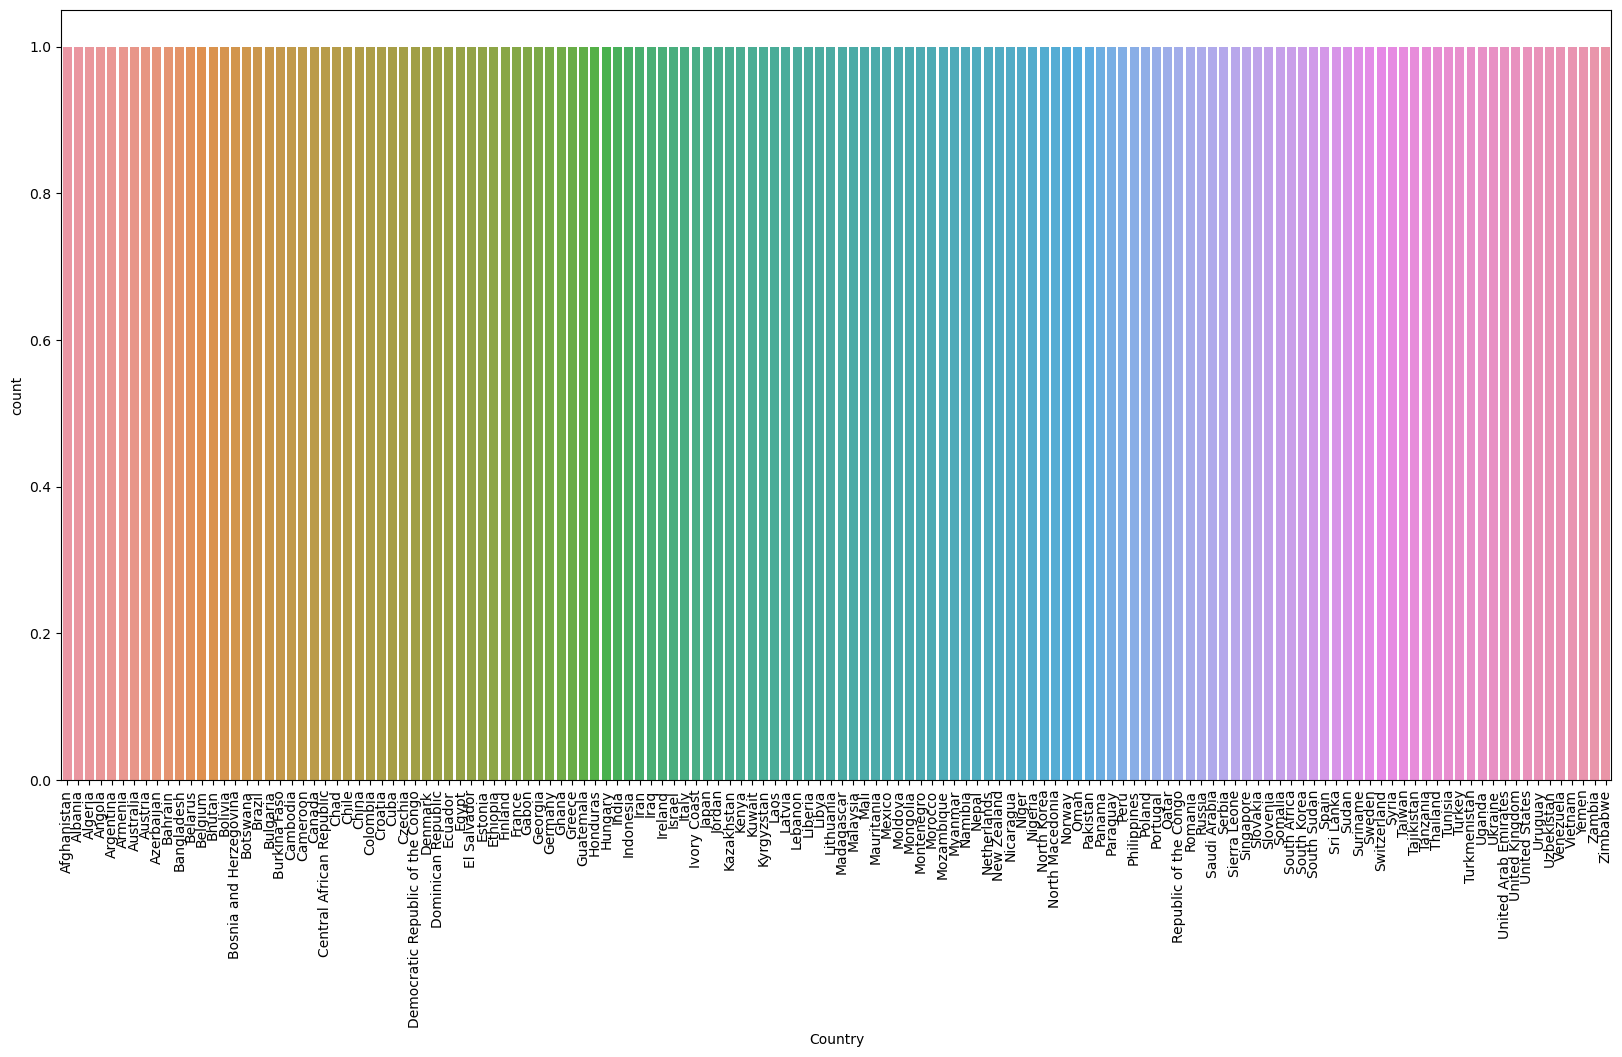

In [75]:
plt.figure(figsize = (20,10))
sns.countplot(df["Country"])
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='Military Strength Power Index', ylabel='Country'>

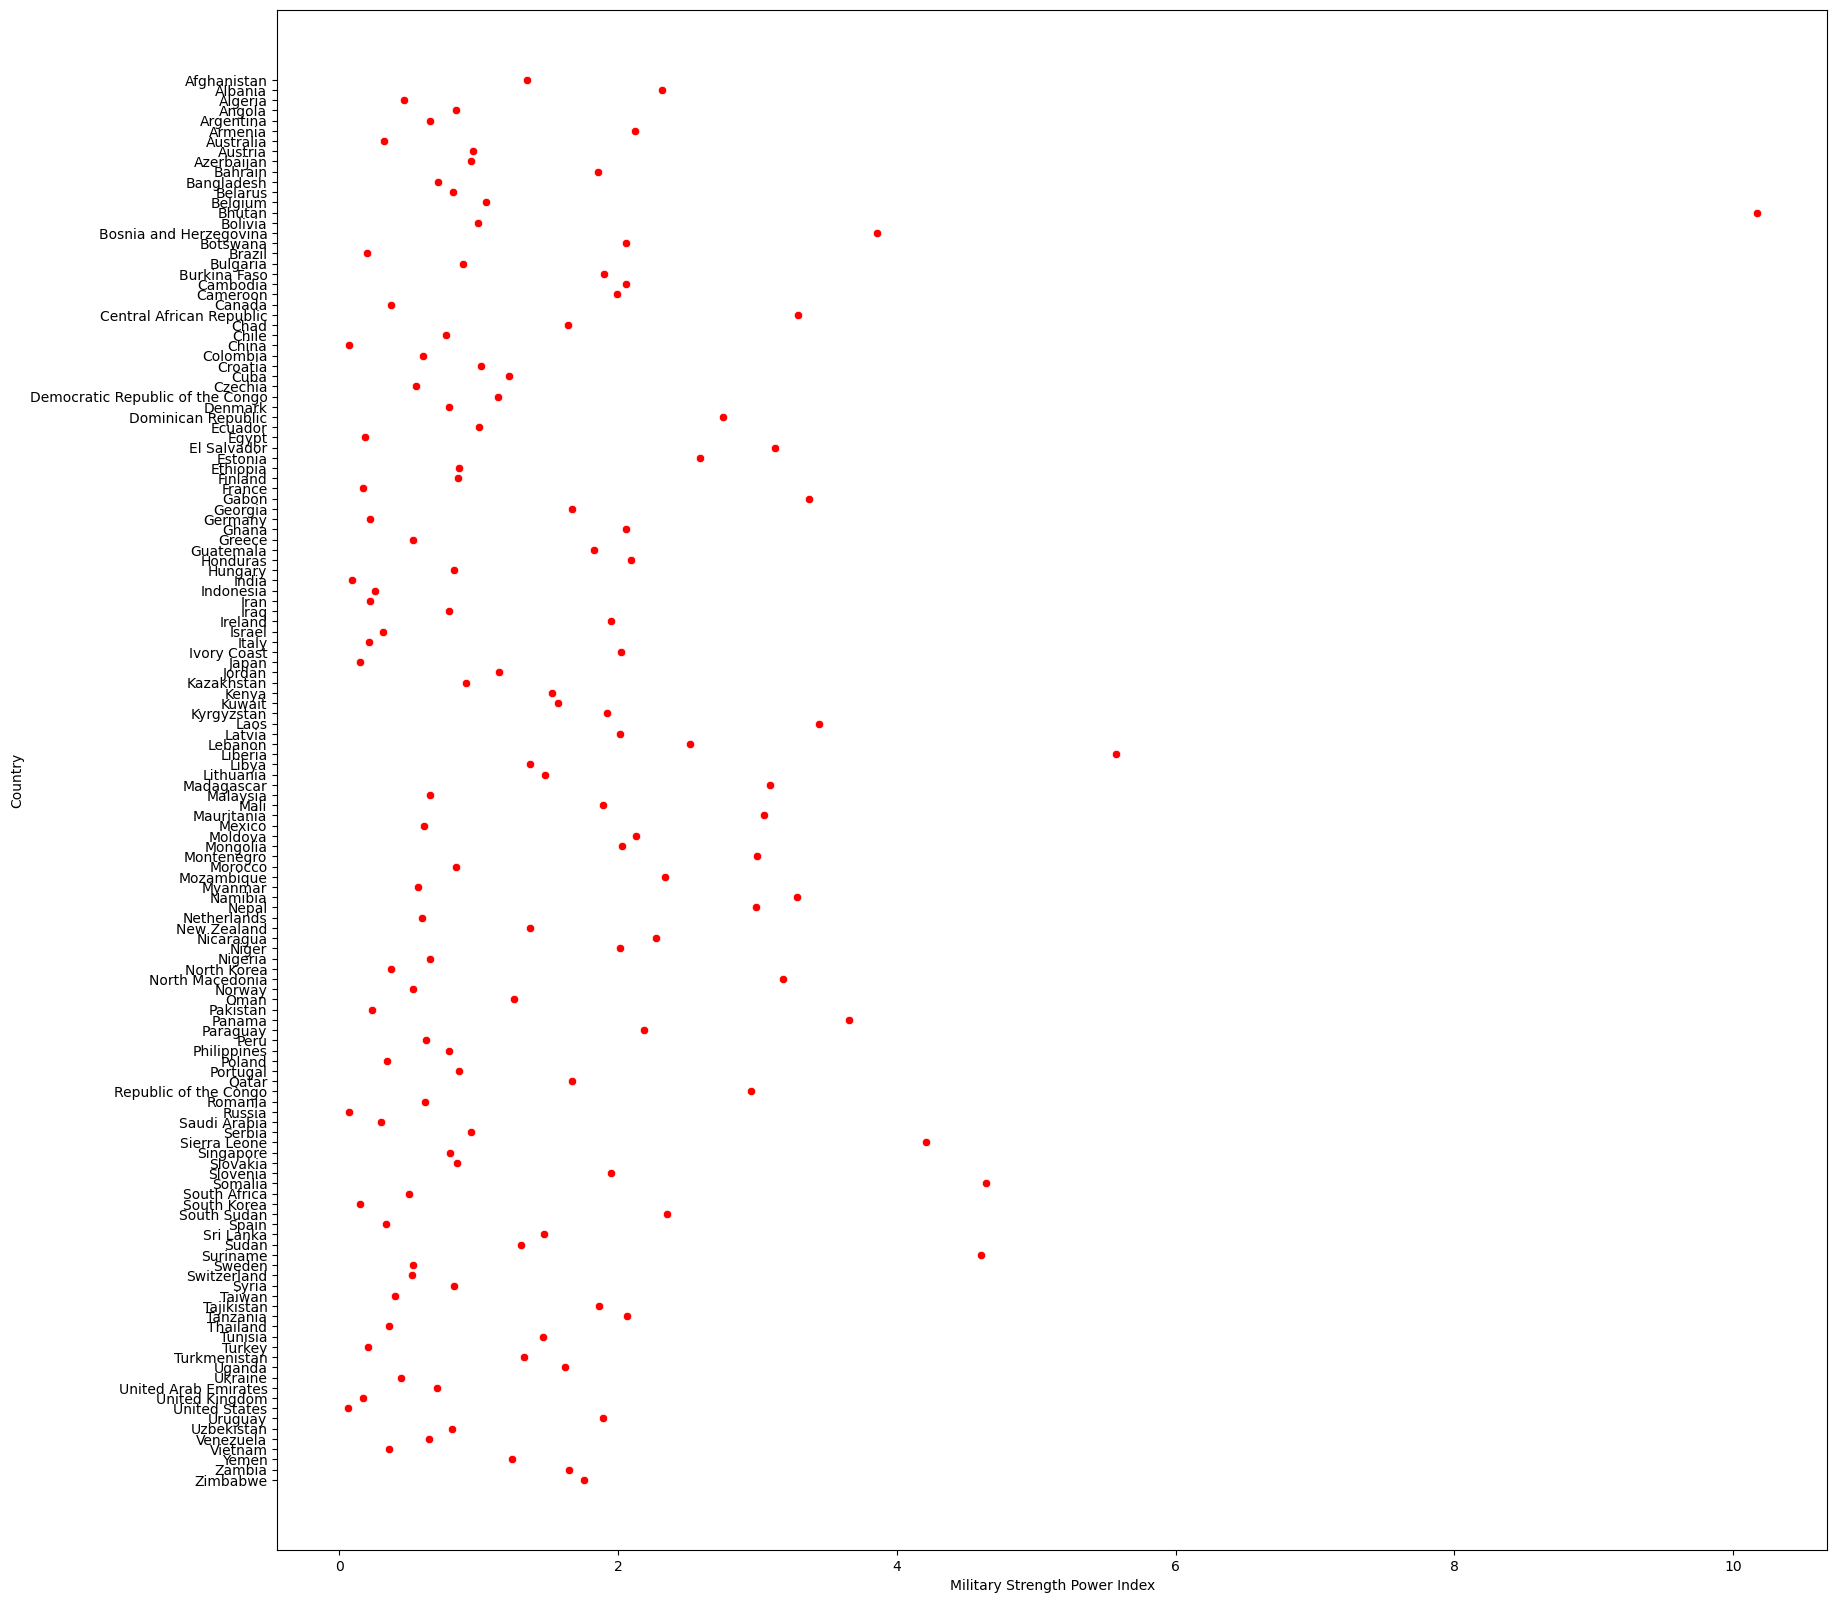

In [112]:
## 
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.scatterplot(x='Military Strength Power Index',y='Country',data=df,color='r')

In [113]:
x = df.drop(["Country"], axis=1)
x = pd.get_dummies(x,drop_first=True)
model = KMeans(n_clusters = 5)
model = model.fit(x)
pred = model.predict(x)
x["cluster"] = pred
x.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
0,1.3444,260,0,25,30,0,187,0,0,1062,...,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0
1,2.3137,19,0,0,0,0,19,0,0,467,...,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0
2,0.4659,551,103,22,59,87,257,45,880,7361,...,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0
3,0.8379,295,72,18,30,47,126,15,379,595,...,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0
4,0.6521,227,24,7,9,64,100,0,370,739,...,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0


In [116]:
allscore=[]
allcluster=[]
distances=[] 
def fnc_clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)         
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        allscore.append(score)
        distance=model.inertia_
        print("Cluster..:",i," Score..:", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance) 

In [117]:
fnc_clust(10)

Cluster..: 2  Score..: 0.9227153206136329
Cluster..: 3  Score..: 0.8995442950361631
Cluster..: 4  Score..: 0.8671436271439987
Cluster..: 5  Score..: 0.8675195540746111
Cluster..: 6  Score..: 0.7789462745536555
Cluster..: 7  Score..: 0.7817947546427708
Cluster..: 8  Score..: 0.7766982061360016
Cluster..: 9  Score..: 0.7809562458841909
Cluster..: 10  Score..: 0.6795886784648338


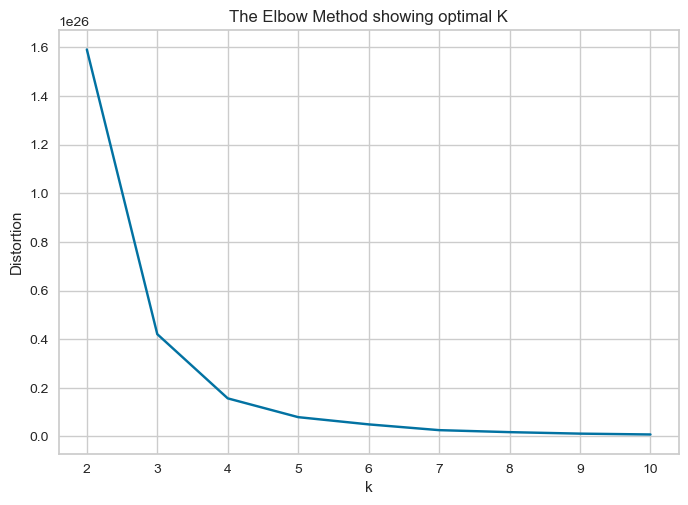

In [125]:
## 4 gruptan itibaren düşmeye başlamış
#plt.plot(allcluster,distances,color='Red');
#Elbow Dirsek Metodu
plt.plot(allcluster,distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() #4 te kırılma olmuş, kırılma noktası, elbow metodu nerede kırılma varsa cluster yapıyoruz?

# Hierarchical Clustering

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [120]:
link_data=linkage(x,method="ward",metric="euclidean")

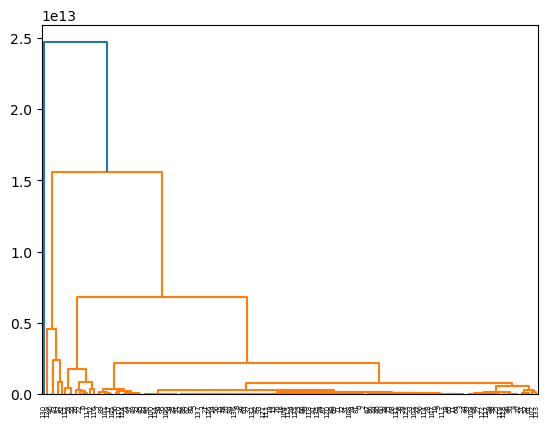

In [121]:
dendrogram(link_data)
plt.show()

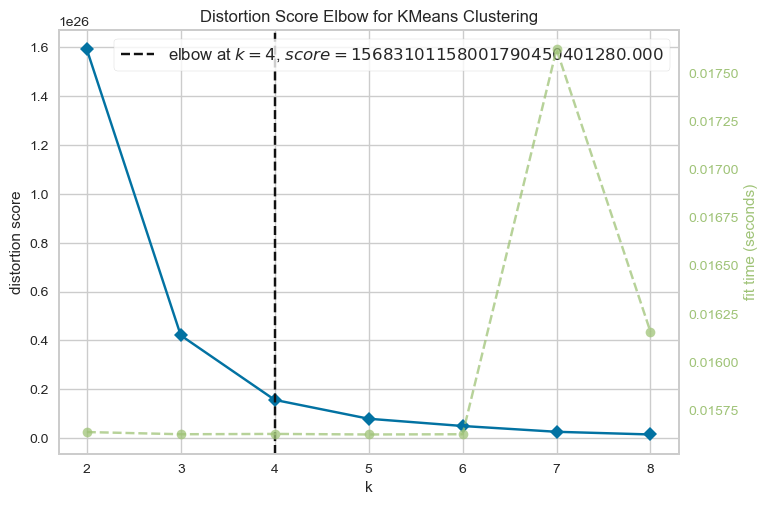

In [124]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(x)        
visualizer.show();

In [134]:
# Model ile Tahminlediğimiz Clusterimizi Gruplayıp Grafik Üzerinden Gösteriyoruz.

In [126]:
d={1:"Az gelismis",2:"cok gelismis",3:"gelismis",0:"orta gelismis"}
x['gelismis']=x.cluster.map(d)

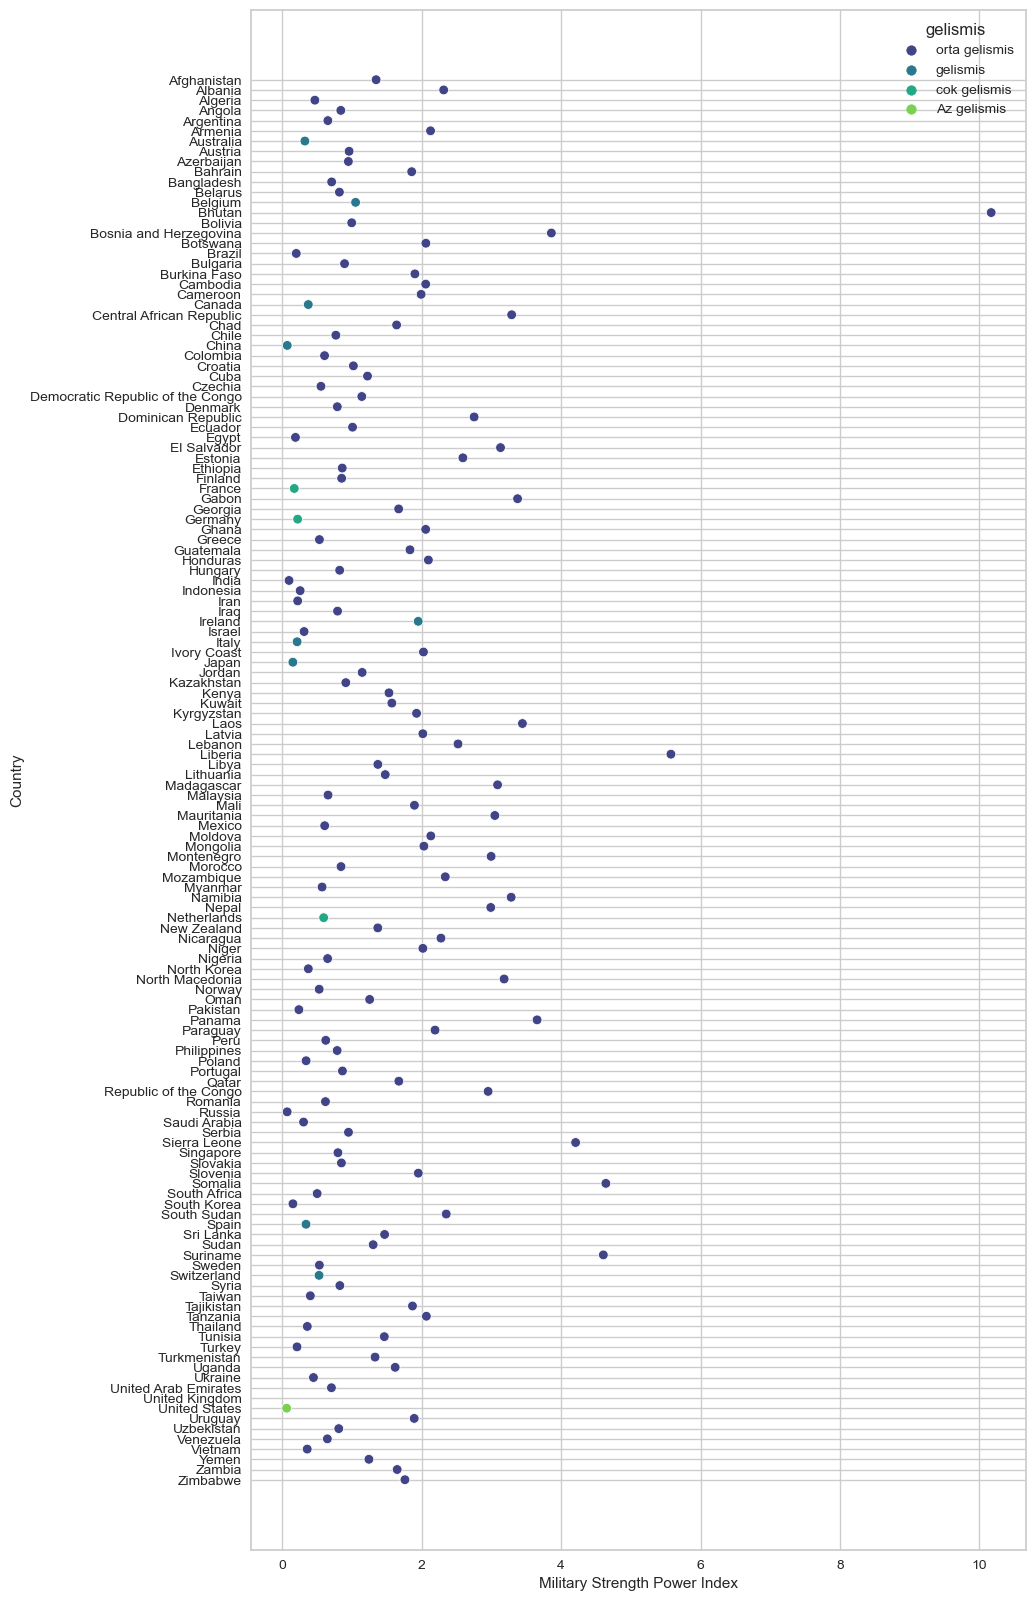

In [128]:
plt.figure(figsize=(10,20))
sns.scatterplot(x["Military Strength Power Index"], 
                df["Country"], hue= x.gelismis,palette= "viridis");